In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [417]:
contestants_url = "https://raw.githubusercontent.com/tturocy/eco7026a/main/2022-23/contestants.csv"
votes_url = "https://raw.githubusercontent.com/tturocy/eco7026a/main/2022-23/votes.csv"

# Read the Data

In [418]:
contestants = pd.read_csv(contestants_url)
votes = pd.read_csv(votes_url)

# Explore Contestants Data 

In [419]:
contestants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1734 non-null   int64  
 1   to_country_id      1734 non-null   object 
 2   to_country         1734 non-null   object 
 3   performer          1734 non-null   object 
 4   song               1731 non-null   object 
 5   place_contest      1678 non-null   float64
 6   sf_num             640 non-null    float64
 7   running_final      1398 non-null   float64
 8   running_sf         605 non-null    float64
 9   place_final        1397 non-null   float64
 10  points_final       1385 non-null   float64
 11  place_sf           605 non-null    float64
 12  points_sf          605 non-null    float64
 13  points_tele_final  181 non-null    float64
 14  points_jury_final  181 non-null    float64
 15  points_tele_sf     212 non-null    float64
 16  points_jury_sf     212 n

In [421]:
contestants.head(5)

,year,to_country_id,to_country,performer,song,place_contest,sf_num,running_final,running_sf,place_final,...,place_sf,points_sf,points_tele_final,points_jury_final,points_tele_sf,points_jury_sf,composers,lyricists,lyrics,youtube_url
0,1956,ch,Switzerland,Lys Assia,Refrain,2.0,NaN,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Georg Benz Stahl,NaN,"(Refrain d'amour...)\n\nRefrain, couleur du ci...",https://youtube.com/watch?v=IyqIPvOkiRk
1,1956,nl,Netherlands,Jetty Paerl,De Vogels Van Holland,2.0,NaN,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Cor Lemaire,Annie M. G. Schmidt,De vogels van Holland zijn zo muzikaal\nZe ler...,https://youtube.com/watch?v=u45UQVGRVPA
2,1956,be,Belgium,Fud Leclerc,Messieurs Les Noyés De La Seine,2.0,NaN,3.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Jacques Say;Jean Miret,Robert Montal,Messieurs les noyés de la Seine\nOuvrez-moi le...,https://youtube.com/watch?v=U9O3sqlyra0
3,1956,de,Germany,Walter Andreas Schwarz,Im Wartesaal Zum Großen Glück,2.0,NaN,4.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Walter Andreas Schwarz,NaN,"Es gibt einen Hafen, da fährt kaum ein Schiff\...",https://youtube.com/watch?v=BDNARIDnmTc
4,1956,fr,France,Mathé Altéry,Le Temps Perdu,2.0,NaN,5.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,André Lodge,Rachèle Thoreau,"Chante, carillon\nLe chant du temps perdu\nCha...",https://youtube.com/watch?v=dm1L0XyikKI


# Explore Votes Data 

In [328]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51354 entries, 0 to 51353
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             51354 non-null  int64  
 1   round            51354 non-null  object 
 2   from_country_id  51354 non-null  object 
 3   to_country_id    51354 non-null  object 
 4   from_country     51354 non-null  object 
 5   to_country       51354 non-null  object 
 6   total_points     51354 non-null  int64  
 7   tele_points      11741 non-null  float64
 8   jury_points      11715 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 3.5+ MB


In [329]:
votes.size

462186

# Filter Contestants and Votes to use Data For the Years with Current Point System 

In [338]:
current_point_system_years = votes[votes['total_points'].isin([12, 10, 8, 7, 6, 5, 4, 3, 2, 1])]['year'].unique()

# Filter contestants and votes datasets based on the detected years and grand final
grand_final = votes['round'] == 'final'
contestants = contestants[(contestants['year'].isin(current_point_system_years))]
votes = votes[(votes['year'].isin(current_point_system_years)) & grand_final_mask]

# Explore Filtered Votes  for Current Point System

In [340]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7370 entries, 39613 to 51353
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             7370 non-null   int64  
 1   round            7370 non-null   object 
 2   from_country_id  7370 non-null   object 
 3   to_country_id    7370 non-null   object 
 4   from_country     7370 non-null   object 
 5   to_country       7370 non-null   object 
 6   total_points     7370 non-null   int64  
 7   tele_points      7370 non-null   float64
 8   jury_points      7344 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 575.8+ KB


In [339]:
contestants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 1394 to 1733
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               299 non-null    int64  
 1   to_country_id      299 non-null    object 
 2   to_country         299 non-null    object 
 3   performer          299 non-null    object 
 4   song               299 non-null    object 
 5   place_contest      284 non-null    float64
 6   sf_num             227 non-null    float64
 7   running_final      181 non-null    float64
 8   running_sf         227 non-null    float64
 9   place_final        181 non-null    float64
 10  points_final       181 non-null    float64
 11  place_sf           227 non-null    float64
 12  points_sf          227 non-null    float64
 13  points_tele_final  181 non-null    float64
 14  points_jury_final  181 non-null    float64
 15  points_tele_sf     212 non-null    float64
 16  points_jury_sf     212 non-

# Question 1 - Internal Data Consistency Check 

# Question 1a : Data Consistency Check for Contestants Votes

In [341]:
def contestants_votes_consistency_check(contestants , votes):
    contestants_points_final = contestants[['year', 'to_country_id', 'points_final']].dropna(subset=['points_final'])
    contestants_points_final.rename(columns={'points_final': 'total_points' , 'to_country_id' : 'to_country'}, inplace=True)
    
    contestant_points = contestants_points_final['total_points']
    votes_total_points = votes.groupby(['year', 'to_country'])['total_points'].sum().reset_index()['total_points']

    # Sort the arrays
    contestant_points_sorted = np.sort(contestant_points.to_numpy())
    votes_total_points_sorted = np.sort(votes_total_points.to_numpy())

    # Compare the sorted arrays
    points_check = np.array_equal(contestant_points_sorted, votes_total_points_sorted)


    # Print the result of the comparison
    print("\nInternal Consistency Verification:")
    print("Points Consistency:", points_check)
contestants_votes_consistency_check(contestants,votes)


Internal Consistency Verification:
Points Consistency: True


# Question 1b : Rank Consistency Check 

In [401]:
def check_rank_consistency(contestants):
    inconsistent_entries = []
    #Clean the contestants dataframe by dropping rows whose points_final is NaN
    contestants_df = contestants[['to_country' , 'year', 'points_final', 'place_final']].dropna(subset=['points_final'])
    for index, contestant in contestants_df.iterrows():

        # Verify ranking of contestants
        expected_rank = contestants_df[contestants_df['year'] == contestant['year']].sort_values(by='points_final', ascending=False).reset_index(drop=True)
        if contestant['place_final'] != expected_rank[expected_rank['to_country'] == contestant['to_country']].index[0] + 1:
            inconsistent_entries.append(f"Year: {contestant['year']}, Country: {contestant['to_country']}, Rank Mismatch")

    # Report discrepancies
    if inconsistent_entries:
        print("Discrepancies found:")
        for entry in inconsistent_entries:
            print(entry)
    else:
        print("No discrepancies found.")
check_rank_consistency(contestants)

No discrepancies found.


# 2. Most and least successful countries

The most successful countries based on mean are:

 to_country
Bulgaria               283.000000
Australia              219.857143
Ukraine                201.277778
Serbia & Montenegro    200.000000
Russia                 160.454545
Name: points_final, dtype: float64

The least successful countries based on mean are:

 to_country
Morocco        7.000000
Slovakia      14.000000
Monaco        35.142857
Yugoslavia    37.518519
Luxembourg    39.527778
Name: points_final, dtype: float64


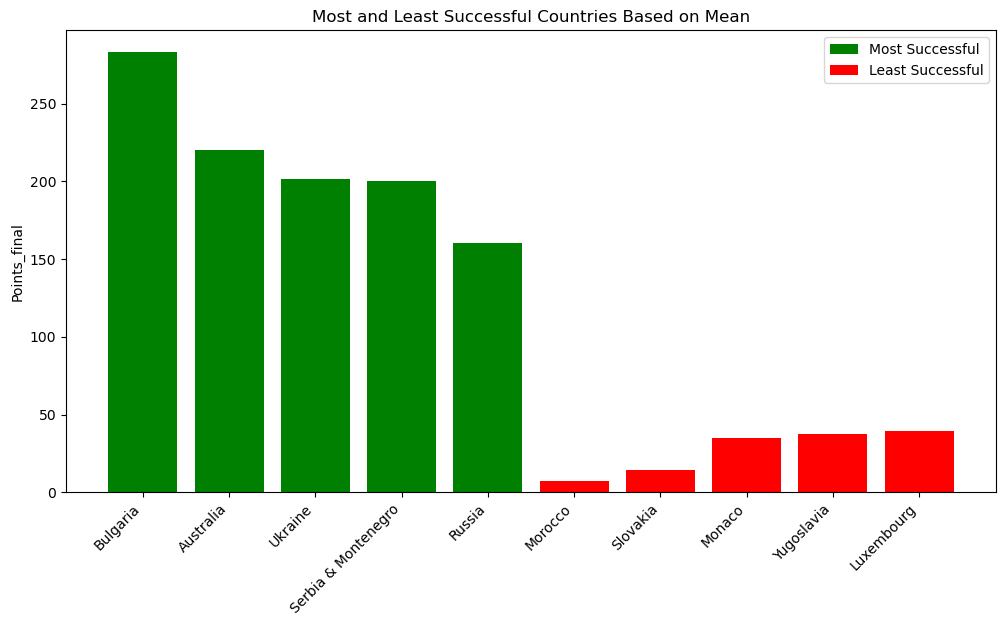

In [430]:
def most_least_successful(contestants, votes):
    # Define success measure (e.g., average points or median)
    success_measure = 'points_final'
    
    # Calculate mean and median success measures for each country
    country_mean_success = contestants.groupby('to_country')[success_measure].mean()

    # Identify most and least successful countries based on mean
    most_successful_countries_mean = country_mean_success.nlargest(5)
    least_successful_countries_mean = country_mean_success.nsmallest(5)

   

    print("The most successful countries based on mean are:")
    print("\n", most_successful_countries_mean)
    
    print("\nThe least successful countries based on mean are:")
    print("\n", least_successful_countries_mean)
    # Plot bar chart
    plt.figure(figsize=(12, 6))

    # Plot most successful countries
    plt.bar(most_successful_countries_mean.index, most_successful_countries_mean, color='green', label='Most Successful')

    # Plot least successful countries
    plt.bar(least_successful_countries_mean.index, least_successful_countries_mean, color='red', label='Least Successful')

    plt.ylabel(success_measure.capitalize())
    plt.title('Most and Least Successful Countries Based on Mean')
    plt.legend()
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
    plt.show()


# Example usage:
most_least_successful(contestants, votes)

# 3. Ordering Effects Analysis 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1734 non-null   int64  
 1   to_country_id      1734 non-null   object 
 2   to_country         1734 non-null   object 
 3   performer          1734 non-null   object 
 4   song               1731 non-null   object 
 5   place_contest      1678 non-null   float64
 6   sf_num             640 non-null    float64
 7   running_final      1398 non-null   float64
 8   running_sf         605 non-null    float64
 9   place_final        1397 non-null   float64
 10  points_final       1385 non-null   float64
 11  place_sf           605 non-null    float64
 12  points_sf          605 non-null    float64
 13  points_tele_final  181 non-null    float64
 14  points_jury_final  181 non-null    float64
 15  points_tele_sf     212 non-null    float64
 16  points_jury_sf     212 n

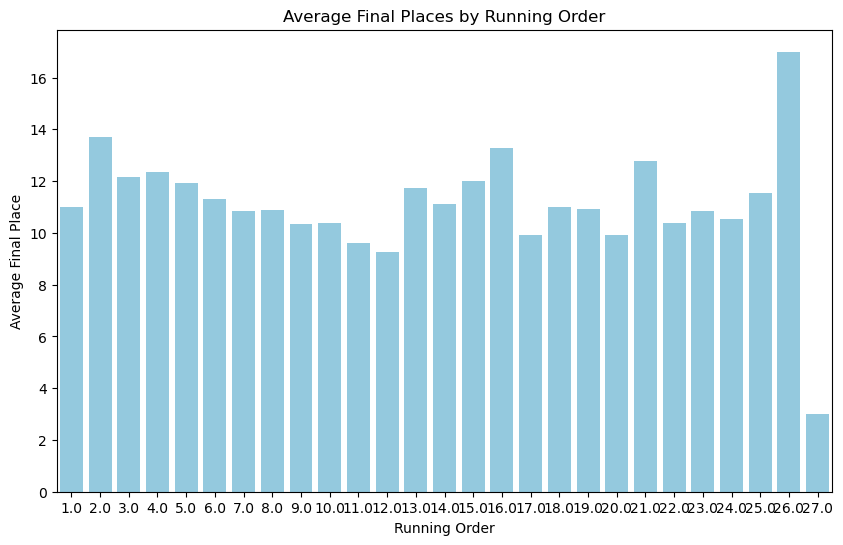

In [424]:
def order_effects_analysis(contestants):
    # Investigate potential ordering effects
    contestants.info()
    order_effects = contestants.groupby('running_final')['place_final'].mean()

    # Test for correlation (Spearman's rank correlation coefficient)
    correlation, p_value = spearmanr(order_effects.index, order_effects.values)
    
    # Print results
    print("\nOrdering Effects Analysis:")
    print(order_effects)
    print("\nSpearman's Rank Correlation Coefficient:", correlation)
    print("P-value:", p_value)
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=order_effects.index, y=order_effects.values, color='skyblue')
    plt.title('Average Final Places by Running Order')
    plt.xlabel('Running Order')
    plt.ylabel('Average Final Place')
    plt.show()

# Assuming 'contestants' is your DataFrame
order_effects_analysis(contestants)

# 4. Reciprocity analysis up to 2016

In [431]:

def reciprocity_analysis(votes):
    # Filter data up to and including 2017
    votes_sub_2015 = votes[votes['year'] <= 2017]
    
    # Identify reciprocal pairs
    reciprocal_pairs = votes_sub_2015.merge(votes_sub_2015.rename(columns={'from_country': 'to_country', 'to_country': 'from_country'}),
                                            on=['year', 'from_country', 'to_country', 'total_points'], how='inner')
    
    # Print evidence of reciprocity
    print("\nReciprocity Analysis (Up to 2017):")
    print("Number of Reciprocal Pairs:", len(reciprocal_pairs))

reciprocity_analysis(votes)


Reciprocity Analysis (Up to 2017):
Number of Reciprocal Pairs: 17946


# 5. Jury vs Public voting analysis from 2016 onwards


Jury vs Public Voting Analysis (2016 onwards):
to_country
al    0.574586
at    0.578488
az    0.642820
bg    0.673235
ch    0.720741
cz    0.508851
dk    0.552284
es    0.747721
fr    0.777512
ge    0.713995
hr    0.578297
ie    0.658238
is    0.746565
lt    0.567615
md    0.596580
mt    0.638516
no    0.536409
pt    0.825755
rs    0.758355
se    0.690396
sm    0.439962
Name: jury_points, dtype: float64


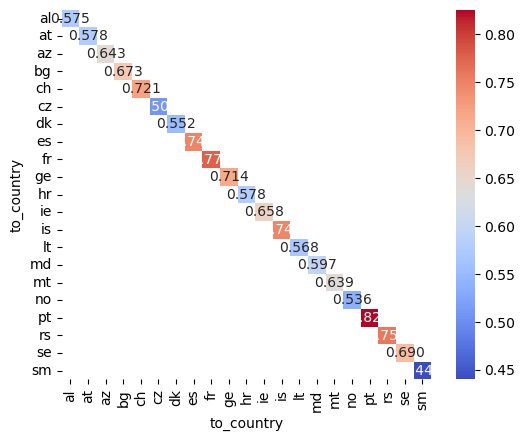

In [410]:

def jury_vs_public_analysis(contestants, votes):
    # Filter data from 2016 onwards
    contestants_2016_onwards = contestants[contestants['year'] >= 2016]
    votes_2016_onwards = votes[votes['year'] >= 2016]
    
    # Calculate correlation between jury and public voting
    correlation = votes_2016_onwards.groupby('to_country')[['tele_points', 'jury_points']].corr().groupby(level=0).mean().iloc[0::2, -1]

    # Print correlation results
    print("\nJury vs Public Voting Analysis (2016 onwards):")
    print(correlation)

    # Create a DataFrame from the correlation results
    correlation_df = pd.DataFrame(correlation)
    
    # Reset the index for better visualization
    correlation_df.reset_index(inplace=True)
    
    # Create a pivot table for better visualization
    correlation_matrix = correlation_df.pivot_table(index='to_country', columns='to_country', values='jury_points', aggfunc='mean')

    # Plot the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f", square=True)

    # Show the plot
    plt.show()

jury_vs_public_analysis(contestants, votes)